## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


**EXERCISE**: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:
 
 1. Download csv file and read it with pandas
 2. Understanding the data and visualization
 3. Linear Regression
 4. Generate an accurate model with the help of Sci-kit learn


# 1. Download csv file and read it with pandas

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x29b18255490>)

We can now create a Pandas dataframe using the downloaded file, to view and analyze data

In [5]:
!pip install pandas --quiet

In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv')

In [8]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 2. Understanding the data and visualization

1338 rows x 7 columns -> each row of the dataset contains information about 1 customer

In [9]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that age, bmi, children and charges are of type number, and sex, smoker and region are of type object (string).

There are no empty columns

In [10]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Useful function to see if data make sense.For example we can see that the insurance company doesn't have customers under 18 or over 64

In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age
Minimum age is 18 and maximum age is 64

In [14]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [22]:
fig = px.histogram(medical_df,
                  x='age',
                  marginal='box',
                  nbins=47,
                  title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

This chart resembles a uniform distribution

Why there are over twice as many customer ages 18 and 19, compared to other ages?

Assumptions
- Offering lower insurance premium for ages below 20?
- 18 is minimum age to get insurance, so people get it as soon as possible?

### Body mass index
BMI of customers

In [23]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [24]:
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI (Body mass index)')
fig.update_layout(bargap=0.1)
fig.show()

This chart resembles a normal distribution chart

### Medical charges
Visualize medical charges for customers. Column we are trying to predict. Use the categorical column smoker to distinguish the charges for smokers vs non-smokers

In [31]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['green','grey'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Resembles a negative exponential chart. Significant difference between smokers and non-smokers

### Smoker
Visualize distribution smoker column

In [32]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [37]:
px.histogram(medical_df, x='smoker', color='sex',title='Smoker chart')

### Age and charges

In [38]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

We can see three clusters: Mayority of Non-smokers, and two groups of smokers

### BMI and Charges

In [39]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

For non-smokers there doesn't seem to be a relationship between BMI and charges, oustside of some outliers

For smokers there seems to be two clusters: Below 30 BMI and over 30 BMI

### Children and charges

In [41]:
px.violin(medical_df, x='children',y='charges')

### Correlation

There are values which are more closely related than others to the charges column. To which extent? -> correlation coefficient

In [42]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [43]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [44]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

To compute the correlation for categorical columns, they must be first converted into numeric

In [45]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [46]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

The greater the **absolute value** of the correlation coefficient, the stronger the relation

**Direction**: can be positive (both values increase at the same time) or negative (downward slope)

In [47]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation matrix')

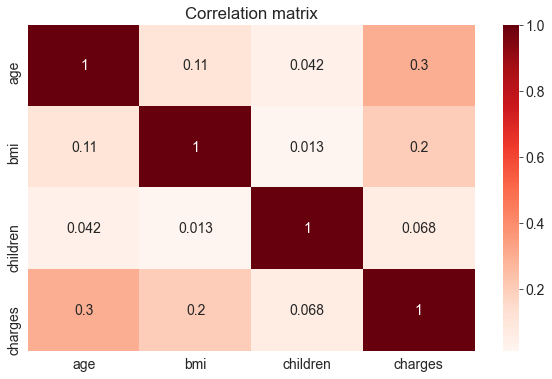

In [48]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation matrix')

Correlation does not give you a direction on the relationship (we don't know if a causes b or b causes a)

It needs human insights we shouldn't blindly trust results

# 3. Linear Regression

### Linear Regression using a Single Feature

Let's find a way to estimate the value of charges using the value of age for only non-smokers

In [49]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

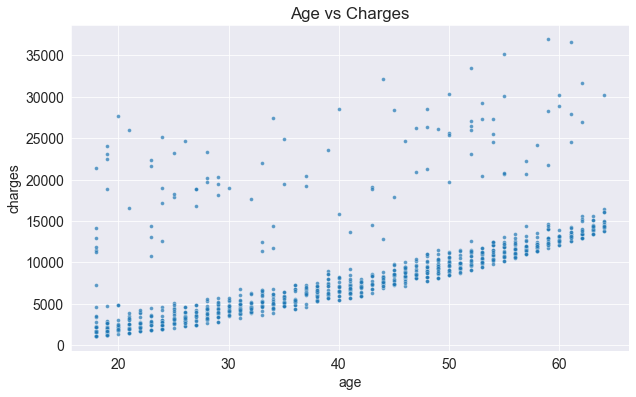

In [50]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7,s=15)

Apart from outliers, the points seem to form a line. We will try to fit a line using this points through:

**y = wx + b**

*charges* = w * *age* + b

Where w is the slope and b the intercept

In [51]:
def estimate_charges(age,w,b):
    return w * age + b

Let's guess values for w and b and use them to estimate the value for charges

In [52]:
w = 50
b = 100

In [54]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)

Text(0, 0.5, 'Estimated charges')

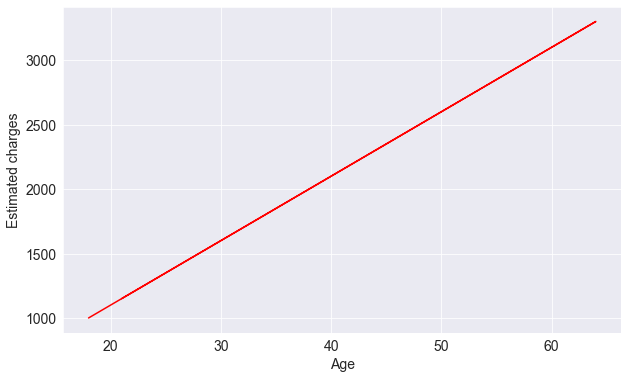

In [57]:
plt.plot(ages, estimated_charges, 'r')
plt.xlabel('Age')
plt.ylabel('Estimated charges')

Check how far is our model from the actual data

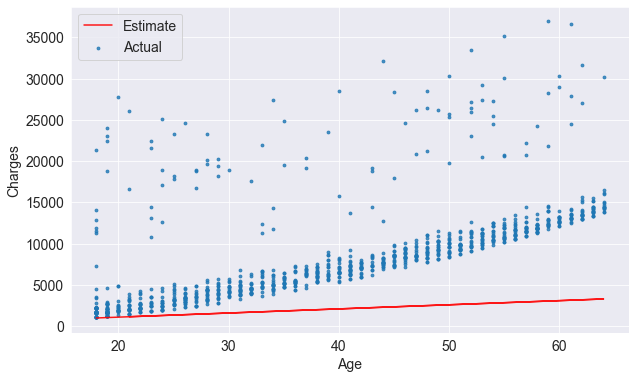

In [59]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [62]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

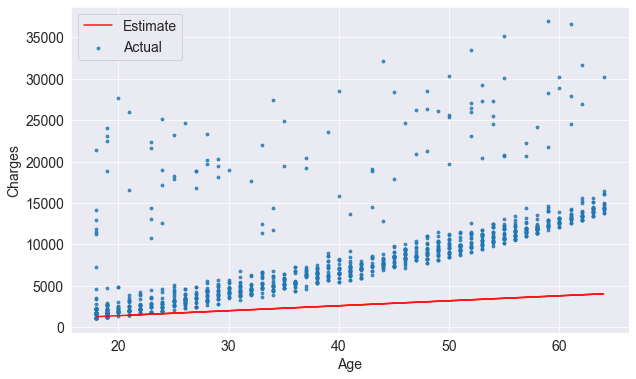

In [63]:
try_parameters(60,200)

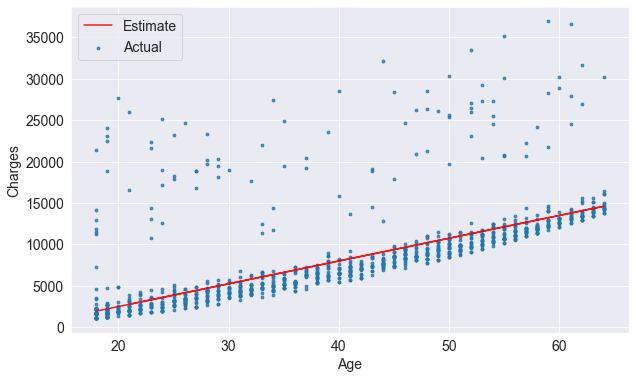

In [73]:
try_parameters(275,-3000)

We need a way to measure numerically how well the line fits the points.

Once the measure of fit has been computed we need a way to modify w and b to improve the fit

### Loss/Cost function

In [74]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [75]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Use the following function:

sq(sum(predicted[i] - actual[i])^2)/N

In [76]:
!pip install numpy --quiet

In [77]:
import numpy as np

In [78]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [80]:
w = 50
b = 100

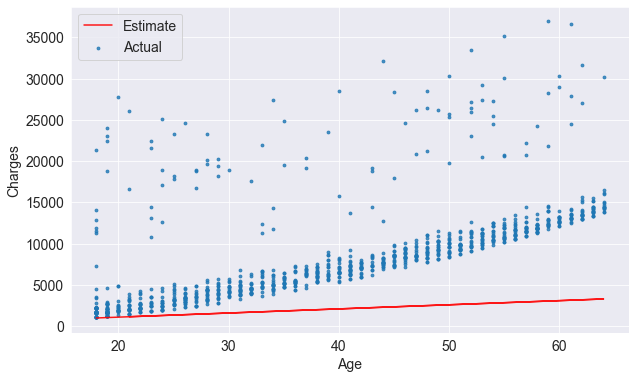

In [81]:
try_parameters(w,b)

In [82]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)

In [83]:
rmse(targets, predicted)

8461.949562575488

The lower the loss, the better the prediction

### Optimizer

We need a strategy to modify weights w and b to reduce the loss and improve the fit of the line to the data

-> Gradient descent

For this we will use **Scikit-learn**

In [84]:
!pip install scikit-learn --quiet

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()

In [87]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [92]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ', inputs.shape)
print('targets.shape : ', targets.shape)

inputs.shape :  (1064, 1)
targets.shape :  (1064,)


In [93]:
model.fit(inputs,targets)

LinearRegression()

In [94]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [95]:
predictions = model.predict(inputs)

In [96]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [97]:
rmse(targets, predictions)

4662.505766636392

In [98]:
# w
model.coef_

array([267.24891283])

In [99]:
# b
model.intercept_

-2091.420556565079

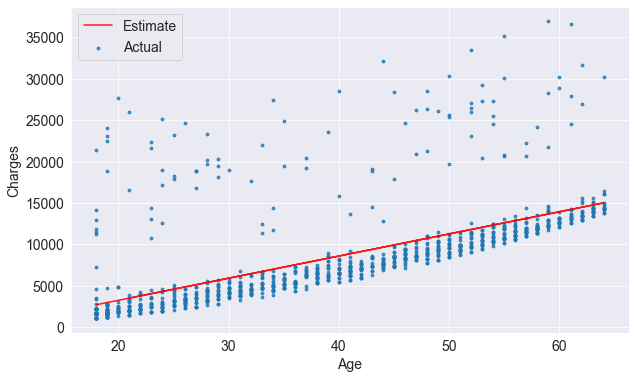

In [100]:
try_parameters(model.coef_, model.intercept_)

# Machine Learning

The process of computing the best parameters to model the relationship between some feature and targets

Every machine learning problem has three components:
1. **Model**
2. **Cost function**
3. **Optimizer**

In [101]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.505766636392


## Linear Regression with multiple features

Add the feature bmi to the model

***charges*** = w1 * ***age*** + w2 * ***bmi*** + b

In [114]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi','children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038245


Adding the BMI doesn't reduce the loss by much, as the BMI has a weak correlation with charges for non-smokers

In [111]:
model.coef_, model.intercept_

(array([241.9307779 , 332.96509081]), -6424.804612240776)

### Using categorical features

Convert categorical into numbers:
- smoker/not-smoker into binary (0|1)
- if column has more than 2 categories -> one-hot encoding: create a new column for each category with 1s and 0s
- If categories have a natural order (cold, neutral, warm, hot) -> (1,2,3,4)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

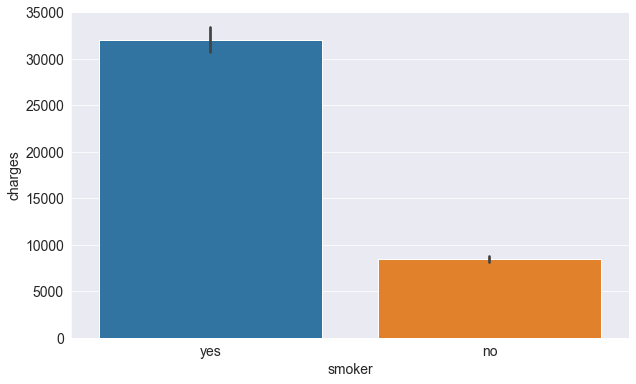

In [115]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [118]:
smoker_codes = {'no': 0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [120]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [121]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


Now we can use the `smoker_code` column for linear regression

In [122]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi','children','smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188077


<AxesSubplot:xlabel='sex', ylabel='charges'>

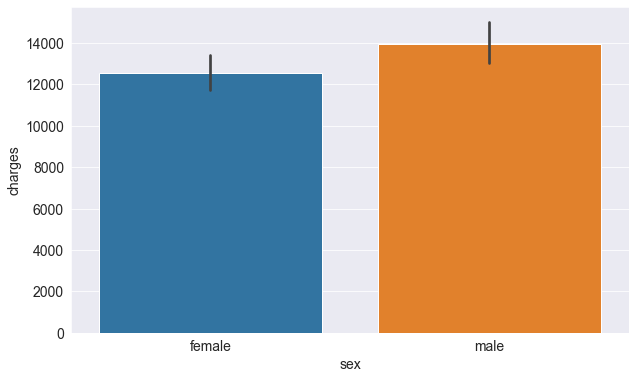

In [123]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [124]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [125]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [126]:
medical_df.charges.corr(medical_df.sex_code)

0.0572920622020254

In [127]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi','children','smoker_code','sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754539


<AxesSubplot:xlabel='region', ylabel='charges'>

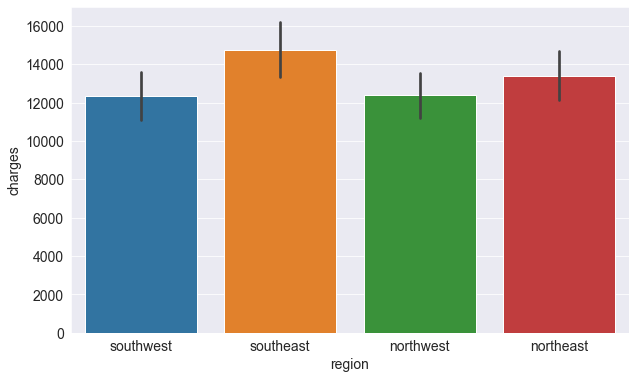

In [128]:
sns.barplot(data=medical_df, x='region', y='charges')

In [130]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [131]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [132]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [133]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [136]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174455


In [138]:
medical_df.loc[10]

age                   25
sex                 male
bmi                26.22
children               0
smoker                no
region         northeast
charges          2721.32
smoker_code            0
sex_code               1
northeast              1
northwest              0
southeast              0
southwest              0
Name: 10, dtype: object

In [141]:
model.predict([[35,40,0,1,1,1,0,0,0]])

array([34336.39208959])

In [142]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

The weights for each parameter don't make sense

This happens because:

1. The ranges for each parameter is different
2. Column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process

Solution -> **Standardization**

This will center the values around 0

In [143]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [146]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [147]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [148]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [152]:
cat_cols = ['smoker_code', 'sex_code', 'northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

In [153]:
inputs = np.concatenate((scaled_inputs,categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174454


Scaling don't affect on linear regression, but it will later

Now if we take a look at the weights:

In [155]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [156]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [157]:
new_customer = [[35,40,0,1,1,1,0,0,0]]

In [158]:
scaler.transform([[35,40,0]])

array([[-0.29954522,  1.53161821, -0.90861367]])

In [159]:
model.predict([[-0.29954522,  1.53161821, -0.90861367, 1,1,1,0,0,0]])

array([34336.39207966])